In [76]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot

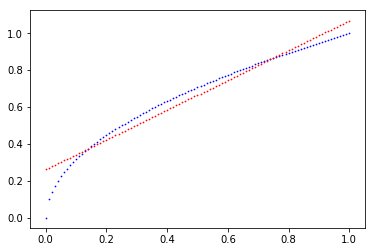

Коэффиценты прямой:
(0.8069979219757194, 0.26131583812416764)
Невязка:
0.269205699507


In [77]:
#Приближение линейной функцией функции корень из х
n = 100
sum_x = 0.0
sum_y = 0.0
sum_xy = 0.0
sum_xx = 0.0
r = 0.0
sqrt_x = []
sqrt_y = []
lin_x = []
lin_y = []
for i in range(0, n + 1):
    sum_x += float(i) / n
    sum_y += math.sqrt(float(i) / n)
    sum_xy += i * math.sqrt(float(i) / n) / n
    sum_xx += float(i * i) / (n * n)
    sqrt_x.append(float(i) / n)
    lin_x.append(float(i) / n)
    sqrt_y.append(math.sqrt(float(i) / n))
a = ((n + 1) * sum_xy - sum_x * sum_y) / ((n + 1) * sum_xx - sum_x * sum_x)
b = (sum_y - a * sum_x)/ (n + 1)
for i in range(0, n + 1):
    lin_y.append(a * float(i) / n + b)
    r += (a * float(i) / n + b - math.sqrt(float(i) / n))**2
plot = plt.pyplot.scatter(sqrt_x, sqrt_y, s = 0.5, c = 'b')
plot = plt.pyplot.scatter(lin_x, lin_y, s = 0.5, c = 'r')
plt.pyplot.show()
print("Коэффиценты прямой:")
print(a, b)
print("Невязка:")
print(abs(r))

In [78]:
def gradient(a, b , c, n, sqrt_x, sqrt_y):
    grad = np.zeros(3)
    for i in range(0, n + 1):
        grad[0] += (a * math.exp(b * sqrt_x[i]) + c - sqrt_y[i]) * 2 * math.exp(b * sqrt_x[i])
        grad[1] += (a * math.exp(b * sqrt_x[i]) + c - sqrt_y[i]) * 2 * a * math.exp(b * sqrt_x[i]) * sqrt_x[i]
        grad[2] += (a * math.exp(b * sqrt_x[i]) + c - sqrt_y[i]) * 2
    return grad

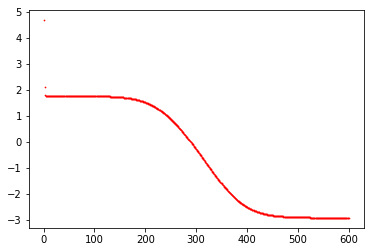

Коэффиценты:
(-1.1842050261657995, -1.2159036243882906, 1.3509525633939563)
Невязка:
0.05416962333474033


In [79]:
#Приближение функцией aexp(bx) + c функции корень из х
a = 1.0
b = 1.0
c = 1.0
r = 0.0
t = 0.002
r_x = []
r_y = []
j = 0
for i in range(0, n + 1):
    r += a * math.exp(b * sqrt_x[i]) + c - sqrt_y[i]
while (r > 0.00000001 and j < 600):
    j += 1
    grad = gradient(a, b, c, n, sqrt_x, sqrt_y)
    a = a - t * grad[0]
    b = b - t * grad[1]
    c = c - t * grad[2]
    r = 0.0
    for i in range(0, n + 1):
        r += (a * math.exp(b * sqrt_x[i]) + c - sqrt_y[i])**2
    r_x.append(j)
    r_y.append(math.log(r))
plot = plt.pyplot.scatter(r_x, r_y, s = 0.5, c = 'r')
plt.pyplot.show()
print("Коэффиценты:")
print(a, b, c)
print("Невязка:")
print(r)

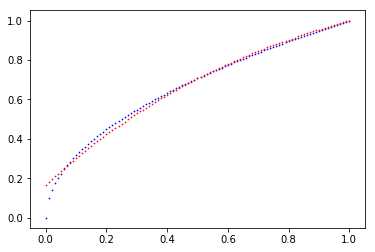

In [80]:
exp_x = []
exp_y = []
for i in range(0, n + 1):
    exp_y.append(a * math.exp(b * sqrt_x[i]) + c)
    exp_x.append(sqrt_x[i])
plot = plt.pyplot.scatter(sqrt_x, sqrt_y, s = 0.5, c = 'b')
plot = plt.pyplot.scatter(exp_x, exp_y, s = 0.5, c = 'r')
plt.pyplot.show()